<a href="https://colab.research.google.com/github/Mask256/Mask256/blob/main/Dr_Mize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential





In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
image_path ='/content/drive/MyDrive/dataset256/data'

In [8]:
ls

drive/  sample_data/


In [9]:
!cd /content/drive/MyDrive/dataset256/data

In [7]:
ls


drive/  sample_data/


In [10]:
ls /content/drive/MyDrive/dataset256/data

Blight/  Common_Rust/  Gray_Leaf_Spot/  Healthy/


In [17]:
image_path = tf.keras.utils.get_file('/content/drive/MyDrive/dataset256/data', 'https://www.kaggle.com/smaranjitghose/corn-or-maize-leaf-disease-dataset', untar=True)

In [19]:
dataset_dir = pathlib.Path(image_path)

In [20]:
image_count = len(list(dataset_dir.glob('*/*.jpg')))
print(image_count)

1658


In [21]:
batch_size=32
image_height=224
image_width=224

In [22]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [23]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [25]:
class_names = train_dataset.class_names
print(class_names)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


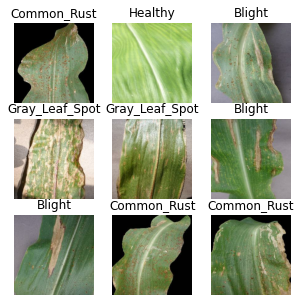

In [26]:
plt.figure(figsize=(5, 5))
for images, labels in train_dataset.take(1):
  for i in range(9):
    axis = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [27]:
for image_batch, label_batch in train_dataset:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [28]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [30]:
num_classes = 4
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
                    layers.Conv2D(16, 3, padding="same", activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding="same", activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding="same", activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [34]:
epochs = 5
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/5
105/105 [==============================] - 570s 2s/step - loss: 0.7145 - accuracy: 0.7314 - val_loss: 0.4571 - val_accuracy: 0.7742
Epoch 2/5
105/105 [==============================] - 159s 2s/step - loss: 0.3414 - accuracy: 0.8574 - val_loss: 0.3278 - val_accuracy: 0.8554
Epoch 3/5
105/105 [==============================] - 157s 1s/step - loss: 0.2806 - accuracy: 0.8845 - val_loss: 0.3519 - val_accuracy: 0.8674
Epoch 4/5
105/105 [==============================] - 157s 1s/step - loss: 0.2356 - accuracy: 0.9069 - val_loss: 0.2881 - val_accuracy: 0.8746
Epoch 5/5
105/105 [==============================] - 158s 2s/step - loss: 0.1842 - accuracy: 0.9311 - val_loss: 0.3064 - val_accuracy: 0.8889


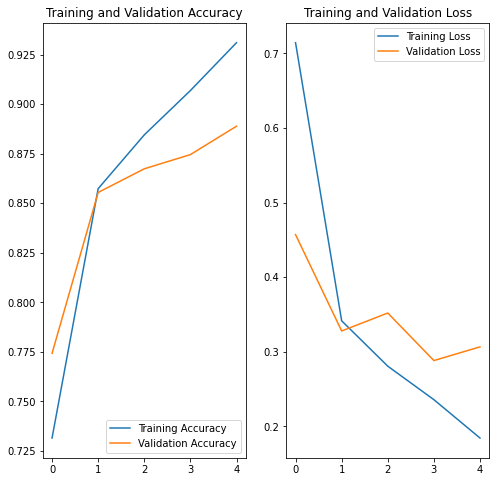

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 5.1 MB/s 
     |████████████████████████████████| 840 kB 34.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 120 kB 44.3 MB/s 
     |████████████████████████████████| 87 kB 6.5 MB/s 
     |████████████████████████████████| 1.2 MB 59.3 MB/s 
     |████████████████████████████████| 211 kB 53.2 MB/s 
     |████████████████████████████████| 1.1 MB 71.8 MB/s 
     |████████████████████████████████| 6.3 MB 49.1 MB/s 
     |████████████████████████████████| 636 kB 40.6 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 103 kB 72.7 MB/s 
     |████████████████████████████████| 37.1 MB 43 kB/s 
     |████████████████████████████████| 99 kB 9.0 MB/s 
     |████████████████████████████████| 352 kB 61.3 MB/s 
     |████████████████████████████████| 200 kB 55.5 MB/s 


In [37]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [38]:
data = DataLoader.from_folder('/content/drive/MyDrive/dataset256/data', 'https://www.kaggle.com/smaranjitghose/corn-or-maize-leaf-disease-dataset')
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 4188, num_label: 4, labels: Blight, Common_Rust, Gray_Leaf_Spot, Healthy.


In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 5124      
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")



117/117 [==============================] - 146s 1s/step - loss: 0.6588 - accuracy: 0.8475
Epoch 2/5
117/117 [==============================] - 143s 1s/step - loss: 0.5289 - accuracy: 0.9217
Epoch 3/5
117/117 [==============================] - 142s 1s/step - loss: 0.5070 - accuracy: 0.9372
Epoch 4/5
117/117 [==============================] - 142s 1s/step - loss: 0.4989 - accuracy: 0.9378
Epoch 5/5
 44/117 [==========>...................] - ETA: 1:33 - loss: 0.4808 - accuracy: 0.9439

In [40]:
loss, accuracy = model.evaluate(test_data)

14/14 [==============================] - 27s 1s/step - loss: 0.5331 - accuracy: 0.9236


In [42]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [43]:
from google.colab import files
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>